In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
from os.path import isfile, join
import subprocess
import datetime
import torch
from random import choice
import shutil

Both CSVs are saved in my [drive](https://drive.google.com/drive/folders/1quR2i5V9xvQe46KSz6VZ78KNOdlnlCu9?usp=sharing) in folder IIS, that you have access to.

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Olga path

%cd /content/gdrive/MyDrive/Technion/IIS/

/content/gdrive/MyDrive/Technion/IIS


In [ ]:
# Lior Path
%cd gdrive/MyDrive/IIS

/content/gdrive/.shortcut-targets-by-id/1quR2i5V9xvQe46KSz6VZ78KNOdlnlCu9/IIS


In [ ]:
!ls

 096235_Assignment2.gdoc        handmade_summary.gdoc
 096235_Project_proposal.gdoc   MultiDocumentModel
 BertSummarizations	       'Project - Phase 3 .gdoc'
 branchesSummaries	        SingleDocumentModel
 grece.gsheet		       'The project - Part 4.gdoc'
'grece - Sheet1.csv'	       'Untitled document.gdoc'
'grece - Sheet2.csv'	        WithBertTokens


In [ ]:
grece = pd.read_csv('grece - Sheet1.csv',sep=',', index_col= 0)
grece['date'] =pd.to_datetime(grece.date)
grece

,title,date,text
n,,,
1b,Greece Struggles to Stay Afloat as Debts Pile On,2009-12-11,Ever since Greece’s credit rating was downgrad...
1g,Infighting Adds to Merkel's Woes,2009-12-23,Chancellor Angela Merkel will be glad when thi...
2b1o,E.U. Official Backs Greece's Deficit Cutting Plan,2010-02-02,Greece’s deficit-cutting plan is ambitious but...
2o,Greek Civil Servants Strike Over Austerity Mea...,2010-02-10,Striking civil servants brought public service...
2r,I.M.F. More Likely to Lead Efforts for Greek Aid,2010-03-23,The International Monetary Fund seemed more li...
3b2g,European Union Sets Deadline for Greece to Mak...,2010-02-16,Greece faced increased pressure Tuesday over i...
3g,Euro Unity: It's Germany That Matters,2010-03-09,"Ten years after the euro, it’s still all about..."
3o,Greece Paralyzed by New Strike,2010-03-11,"Greek public transport was halted, flights gro..."
3r,I.M.F. Is Urged to Move Forward on Voting Changes,2010-04-24,"Officials from the United States, South Korea,..."


In [ ]:
grece_edges = pd.read_csv('grece - Sheet2.csv',sep=',')

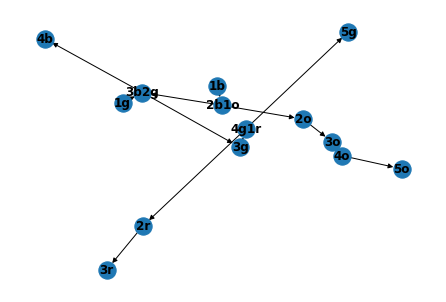

In [ ]:
G = nx.DiGraph()
for g in grece.index:
  G.add_node(g)
  #adding attributes to nodes
  nx.set_node_attributes(G, grece.date, "date")
  nx.set_node_attributes(G, grece.title, "title")
  nx.set_node_attributes(G, grece.text, "text")
#adding edges
G=nx.from_pandas_edgelist(grece_edges,  source='from',target= 'to',create_using=nx.DiGraph())
nx.draw(G, with_labels=True, font_weight='bold')

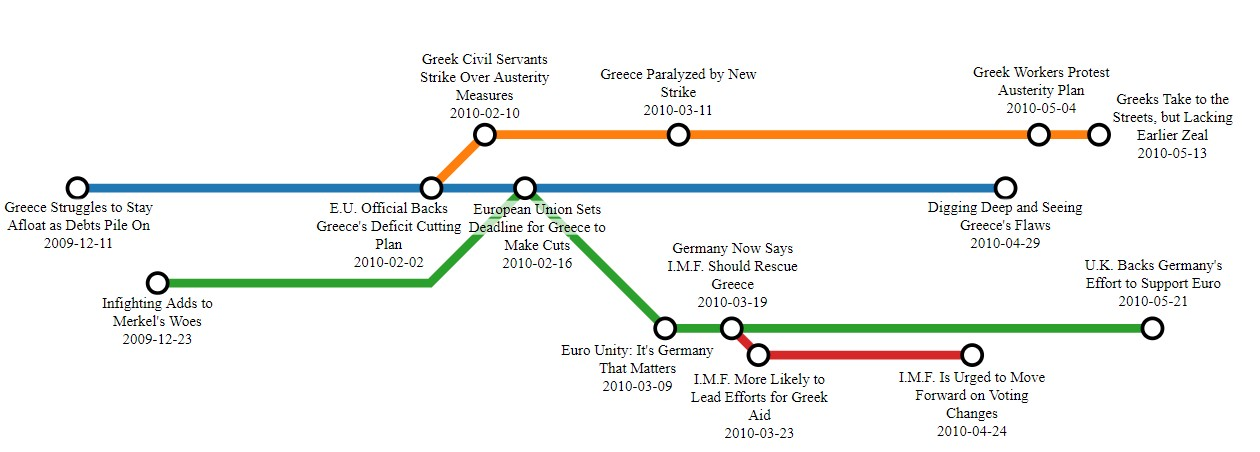
for us to see the connections

# Summarization

## Trained model for multidocument summarization

https://github.com/Alex-Fabbri/Multi-News

In [ ]:
%cd MultiDocumentModel/

/content/gdrive/.shortcut-targets-by-id/1quR2i5V9xvQe46KSz6VZ78KNOdlnlCu9/IIS/MultiDocumentModel


In [ ]:
!git clone https://github.com/Alex-Fabbri/Multi-News

Cloning into 'Multi-News'...
remote: Enumerating objects: 343, done.
remote: Total 343 (delta 0), reused 0 (delta 0), pack-reused 343
Receiving objects: 100% (343/343), 56.63 MiB | 12.60 MiB/s, done.
Resolving deltas: 100% (110/110), done.
Checking out files: 100% (243/243), done.


In [ ]:
%cd Multi-News/

/content/gdrive/.shortcut-targets-by-id/1quR2i5V9xvQe46KSz6VZ78KNOdlnlCu9/IIS/MultiDocumentModel/Multi-News


In [ ]:
%cd code/OpenNMT-py-baselines/

/content/gdrive/.shortcut-targets-by-id/1quR2i5V9xvQe46KSz6VZ78KNOdlnlCu9/IIS/MultiDocumentModel/Multi-News/code/OpenNMT-py-baselines


In [ ]:
!pip install -r requirements.txt

  Cloning https://github.com/pytorch/text to /tmp/pip-req-build-isr9euz0
  Running command git clone -q https://github.com/pytorch/text /tmp/pip-req-build-isr9euz0
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for torchtext
Failed to build torchtext
ERROR: Could not build wheels for torchtext which use PEP 517 and cannot be installed directly


In [ ]:
!python translate.py -gpu 0 -batch_size 50 -beam_size 5 -model models/newser-brnn/newser_step_26000.pt -src /path/to/test.txt.src -output data/newser/test-output/test.brnn.out.min_length200 -min_length 200 -max_length 300 -verbose -stepwise_penalty -coverage_penalty summary -beta 5 -length_penalty wu -alpha 0.9 -block_ngram_repeat 3 -ignore_when_blocking "." "</t>" "<t>"

Namespace(alpha=0.9, attn_debug=False, batch_size=50, beam_size=5, beta=5.0, block_ngram_repeat=3, coverage_penalty='summary', data_type='text', dump_beam='', dynamic_dict=False, fast=False, gpu=0, ignore_when_blocking=['.', '</t>', '<t>'], image_channel_size=3, length_penalty='wu', log_file='', max_length=300, max_sent_length=None, min_length=200, models=['models/newser-brnn/newser_step_26000.pt'], n_best=1, output='data/newser/test-output/test.brnn.out.min_length200', replace_unk=False, report_bleu=False, report_rouge=False, sample_rate=16000, share_vocab=False, src='/path/to/test.txt.src', src_dir='', stepwise_penalty=True, tgt=None, verbose=True, window='hamming', window_size=0.02, window_stride=0.01)
Traceback (most recent call last):
  File "translate.py", line 37, in <module>
    main(opt)
  File "translate.py", line 19, in main
    translator = build_translator(opt, report_score=True)
  File "/content/gdrive/.shortcut-targets-by-id/1quR2i5V9xvQe46KSz6VZ78KNOdlnlCu9/IIS/MultiDoc

## Lior - Trained model for multidocument summarization

[Hierarchical Transformers for Multi-Document Summarization](https://paperswithcode.com/paper/hierarchical-transformers-for-multi-document)

In [ ]:
%cd IIS/MultiDocumentModel/

/content/gdrive/.shortcut-targets-by-id/1quR2i5V9xvQe46KSz6VZ78KNOdlnlCu9/IIS/MultiDocumentModel


In [ ]:
!git clone https://github.com/nlpyang/hiersumm

Cloning into 'hiersumm'...
remote: Enumerating objects: 96, done.
remote: Total 96 (delta 0), reused 0 (delta 0), pack-reused 96
Unpacking objects: 100% (96/96), done.


In [ ]:
%cd hiersumm/src

/content/gdrive/.shortcut-targets-by-id/1quR2i5V9xvQe46KSz6VZ78KNOdlnlCu9/IIS/MultiDocumentModel/hiersumm


#### Prepare Data

In [ ]:
!unzip /content/gdrive/MyDrive/IIS/MultiDocumentModel/hiersumm/data/ranked_wiki_b40.zip
!ls

Archive:  /content/gdrive/MyDrive/IIS/MultiDocumentModel/hiersumm/data/ranked_wiki_b40.zip
   creating: ranked_wiki_b40/
  inflating: ranked_wiki_b40/WIKI.train.191.pt  
  inflating: ranked_wiki_b40/WIKI.train.94.pt  
  inflating: ranked_wiki_b40/WIKI.train.178.pt  
  inflating: ranked_wiki_b40/WIKI.train.208.pt  
  inflating: ranked_wiki_b40/WIKI.train.20.pt  
  inflating: ranked_wiki_b40/WIKI.test.9.pt  
  inflating: ranked_wiki_b40/WIKI.train.209.pt  
  inflating: ranked_wiki_b40/WIKI.train.210.pt  
  inflating: ranked_wiki_b40/WIKI.train.124.pt  
  inflating: ranked_wiki_b40/WIKI.train.118.pt  
  inflating: ranked_wiki_b40/WIKI.train.183.pt  
  inflating: ranked_wiki_b40/WIKI.train.314.pt  
  inflating: ranked_wiki_b40/WIKI.train.315.pt  
  inflating: ranked_wiki_b40/WIKI.train.14.pt  
  inflating: ranked_wiki_b40/WIKI.train.150.pt  
  inflating: ranked_wiki_b40/WIKI.train.62.pt  
  inflating: ranked_wiki_b40/WIKI.train.307.pt  
  inflating: ranked_wiki_b40/WIKI.train.173.pt  
  in

#### Prepare vocabulary

### Evaluation

go to path

In [ ]:
%cd MultiDocumentModel/hiersumm

/content/gdrive/.shortcut-targets-by-id/1quR2i5V9xvQe46KSz6VZ78KNOdlnlCu9/IIS/MultiDocumentModel/hiersumm


In [ ]:
%cd ./../

/content/gdrive/.shortcut-targets-by-id/1quR2i5V9xvQe46KSz6VZ78KNOdlnlCu9/IIS


In [ ]:
!ls

data	 log	    results  vocab
LICENSE  README.md  src      wikisum_model_step_500000.pt


evaluation command

In [ ]:
%cd src

/content/gdrive/.shortcut-targets-by-id/1quR2i5V9xvQe46KSz6VZ78KNOdlnlCu9/IIS/MultiDocumentModel/hiersumm/src


In [ ]:
!pip install sentencepiece

     |████████████████████████████████| 1.2 MB 5.1 MB/s 


In [ ]:
!pip install tensorboardX

     |████████████████████████████████| 125 kB 5.3 MB/s 


In [ ]:
!pip install pyrouge

     |████████████████████████████████| 60 kB 3.3 MB/s 
  Created wheel for pyrouge: filename=pyrouge-0.1.3-py3-none-any.whl size=191621 sha256=fd03b50d209b24f15668762b113482f9fee7186ab1643af9c2fd791aa26048c3
  Stored in directory: /root/.cache/pip/wheels/68/35/6a/ffb9a1f51b2b00fee42e7f67f5a5d8e10c67d048cda09ccd57
Successfully built pyrouge


In [ ]:
!pip install pytorch-transformers==1.2.0 torch==1.1.0

     |████████████████████████████████| 176 kB 5.0 MB/s 
     |████████████████████████████████| 676.9 MB 4.0 kB/s 
     |████████████████████████████████| 895 kB 39.5 MB/s 
     |████████████████████████████████| 132 kB 50.1 MB/s 
     |████████████████████████████████| 8.6 MB 31.0 MB/s 
     |████████████████████████████████| 79 kB 8.0 MB/s 
     |████████████████████████████████| 138 kB 52.3 MB/s 
     |████████████████████████████████| 127 kB 51.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.11.1+cu111 requires t

In [ ]:
!python train_abstractive.py -test_from /content/gdrive/MyDrive/IIS/MultiDocumentModel/hiersumm/checkpoints/wikisum_model_step_500000.pt -data_path /content/gdrive/MyDrive/IIS/MultiDocumentModel/hiersumm/src/ranked_wiki_b40/WIKI -mode test -batch_size 1000 -valid_batch_size 1000 -seed 666 -trunc_tgt_ntoken 400 -trunc_src_nblock 40 -visible_gpus 1 -gpu_ranks 0 -vocab_path /content/gdrive/MyDrive/IIS/MultiDocumentModel/hiersumm/vocab/spm9998_3.model -model_path /content/gdrive/MyDrive/IIS/MultiDocumentModel/hiersumm/checkpoints -log_file /content/gdrive/MyDrive/IIS/MultiDocumentModel/hiersumm/log/log.txt -max_wiki 100000 -dataset test -alpha 0.4 -max_length 400




[2022-02-27 16:58:03,652 INFO] Loading checkpoint from /content/gdrive/MyDrive/IIS/MultiDocumentModel/hiersumm/checkpoints/wikisum_model_step_500000.pt
Namespace(accum_count=1, alpha=0.4, batch_size=1000, beam_size=5, beta1=0.9, beta2=0.998, data_path='/content/gdrive/MyDrive/IIS/MultiDocumentModel/hiersumm/src/ranked_wiki_b40/WIKI', dataset='test', dec_dropout=0, dec_hidden_size=256, dec_layers=6, decay_method='noam', emb_size=256, enc_dropout=1, enc_hidden_size=256, enc_layers=8, ff_size=1024, gpu_ranks=[0], heads=8, hier=True, inter_heads=8, inter_layers=[6, 7], label_smoothing=0.1, length_penalty='wu', log_file='/content/gdrive/MyDrive/IIS/MultiDocumentModel/hiersumm/log/log.txt', lr=3, max_generator_batches=32, max_grad_norm=0, max_length=400, max_wiki=100000, min_length=20, mode='test', model_path='/content/gdrive/MyDrive/IIS/MultiDocumentModel/hiersumm/checkpoints', n_best=1, optim='adam', report_every=100, report_rouge=False, result_path='../../results', save_checkpoint_steps=2

## Lior - Trained model for multidocument summarization TRY II

In [ ]:
!ls

data	 log	    results  vocab
LICENSE  README.md  src      wikisum_model_step_500000.pt


In [ ]:
%cd ./../
!ls

/content/gdrive/.shortcut-targets-by-id/1quR2i5V9xvQe46KSz6VZ78KNOdlnlCu9/IIS/MultiDocumentModel
hiersumm  results


In [ ]:
%cd MultiDocumentModel/

/content/gdrive/.shortcut-targets-by-id/1quR2i5V9xvQe46KSz6VZ78KNOdlnlCu9/IIS/MultiDocumentModel


In [ ]:
!git clone https://github.com/ucfnlp/multidoc_summarization/
!mv pretrained_model_tf1.2.1.zip multidoc_summarization/logs
%cd multidoc_summarization/logs
!unzip pretrained_model_tf1.2.1.zip
!rm pretrained_model_tf1.2.1.zip
%cd ..

Streaming output truncated to the last 5000 lines.
  inflating: pretrained_model_tf1.2.1/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-238410/reference/004108_reference.txt  
  inflating: pretrained_model_tf1.2.1/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-238410/reference/000580_reference.txt  
  inflating: pretrained_model_tf1.2.1/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-238410/reference/006769_reference.txt  
  inflating: pretrained_model_tf1.2.1/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-238410/reference/006639_reference.txt  
  inflating: pretrained_model_tf1.2.1/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-238410/reference/009844_reference.txt  
  inflating: pretrained_model_tf1.2.1/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-238410/reference/009914_reference.txt  
  inflating: pretrained_model_tf1.2.1/decode_test_400maxenc_4beam_35mindec_120maxdec_ckpt-238410/reference/009496_reference.txt  
  inflating: pretrained_model_tf1.2.1/d

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!python convert_data.py --dataset_name=example_custom_dataset --custom_dataset_path=./example_custom_dataset/

In [ ]:
!pip install Queue
import Queue

ERROR: Could not find a version that satisfies the requirement Queue (from versions: none)
ERROR: No matching distribution found for Queue


ModuleNotFoundError: ignored

In [ ]:
!pip install sumy
import sumy

     |████████████████████████████████| 87 kB 3.0 MB/s 
     |████████████████████████████████| 10.1 MB 30.8 MB/s 
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21712 sha256=f90f4bd82008f7b29ad37cabb496bfbebaadff098642d0b47f0d3103d1d5a324
  Stored in directory: /root/.cache/pip/wheels/d4/bf/51/81d27ad638e1a6dca4f362ecc33d1e2c764b8ea7ec751b8fc1
  Created wheel for pycountry: filename=pycountry-22.1.10-py2.py3-none-any.whl size=10595784 sha256=6bba719e51db0f0defc336c18bfd475b22e1cac6f42350826473209a205333ad
  Stored in directory: /root/.cache/pip/wheels/f7/8f/9c/b070d7376caf2beb0685bf72578106b2fd57019ed57d84f126
Successfully built breadability pycountry


In [ ]:
!pip install pyrouge

     |████████████████████████████████| 60 kB 3.2 MB/s 
  Created wheel for pyrouge: filename=pyrouge-0.1.3-py3-none-any.whl size=191621 sha256=1fdfeb28c69e4663c149d2abb42195b0fa22cc9052c939af0caca459a0f5a8e8
  Stored in directory: /root/.cache/pip/wheels/68/35/6a/ffb9a1f51b2b00fee42e7f67f5a5d8e10c67d048cda09ccd57
Successfully built pyrouge


In [ ]:
!python run_summarization.py --dataset_name=example_custom_dataset --pg_mmr

I0226 16:01:12.442794 140137648146304 run_summarization.py:141] Starting seq2seq_attention in decode mode...








max_size of vocab was specified as 50000; we now have 50000 words. Stopping reading.
Finished constructing vocabulary of 50000 total words. Last word added: perisic
No TFIDF vectorizer model file found at logs/tfidf_vectorizer/example_custom_dataset.dill, so fitting the model now.
W0226 16:01:12.516673 140137648146304 batcher.py:314] Bucket input queue is empty when calling next_batch. Bucket queue size: 0, Input queue size: 0
W0226 16:01:12.538316 140137648146304 batcher.py:314] Bucket input queue is empty when calling next_batch. Bucket queue size: 0, Input queue size: 0
W0226 16:01:12.550275 140137648146304 batcher.py:314] Bucket input queue is empty when calling next_batch. Bucket queue size: 0, Input queue size: 0
example_generator completed reading all datafiles. No more data.
W0226 16:01:12.558891 140137648146304 batcher.py:314] Bucket input queue is empty when ca

In [ ]:
import glob
glob.glob('./*')

['./LICENSE.md',
 './README.md',
 './__init__.py',
 './attention_decoder.py',
 './batcher.py',
 './beam_search.py',
 './convert_data.py',
 './data.py',
 './decode.py',
 './example_custom_dataset',
 './importance_features.py',
 './logs',
 './model.py',
 './pg_mmr_functions.py',
 './run_summarization.py',
 './util.py',
 './tf_data',
 './__pycache__']

## Extractive Multi-Document Model
https://github.com/lukereichold/News-Summarizer.git

In [ ]:
%cd IIS

/content/gdrive/.shortcut-targets-by-id/1quR2i5V9xvQe46KSz6VZ78KNOdlnlCu9/IIS


In [ ]:
%cd MultiDocumentModel/
!ls

/content/gdrive/.shortcut-targets-by-id/1quR2i5V9xvQe46KSz6VZ78KNOdlnlCu9/IIS/MultiDocumentModel
hiersumm		results			      results.500000.raw_gold
multidoc_summarization	results.500000.candidate      results.500000.raw_src
Multi-News		results.500000.gold
News-Summarizer		results.500000.raw_candidate


In [ ]:
!git clone https://github.com/lukereichold/News-Summarizer.git

Cloning into 'News-Summarizer'...
remote: Enumerating objects: 25, done.
remote: Total 25 (delta 0), reused 0 (delta 0), pack-reused 25
Unpacking objects: 100% (25/25), done.


In [ ]:
%cd News-Summarizer/

/content/gdrive/.shortcut-targets-by-id/1quR2i5V9xvQe46KSz6VZ78KNOdlnlCu9/IIS/MultiDocumentModel/News-Summarizer


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('reuters')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package reuters to /root/nltk_data...


True

In [ ]:
!unzip /root/nltk_data/corpora/reuters.zip -d /root/nltk_data/corpora

Streaming output truncated to the last 5000 lines.
  inflating: /root/nltk_data/corpora/reuters/training/2231  
  inflating: /root/nltk_data/corpora/reuters/training/2232  
  inflating: /root/nltk_data/corpora/reuters/training/2234  
  inflating: /root/nltk_data/corpora/reuters/training/2236  
  inflating: /root/nltk_data/corpora/reuters/training/2237  
  inflating: /root/nltk_data/corpora/reuters/training/2238  
  inflating: /root/nltk_data/corpora/reuters/training/2239  
  inflating: /root/nltk_data/corpora/reuters/training/2240  
  inflating: /root/nltk_data/corpora/reuters/training/2244  
  inflating: /root/nltk_data/corpora/reuters/training/2246  
  inflating: /root/nltk_data/corpora/reuters/training/2247  
  inflating: /root/nltk_data/corpora/reuters/training/2249  
  inflating: /root/nltk_data/corpora/reuters/training/225  
  inflating: /root/nltk_data/corpora/reuters/training/2251  
  inflating: /root/nltk_data/corpora/reuters/training/2252  
  inflating: /root/nltk_data/corpor

In [ ]:
!python3 driver.py

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecati

In [ ]:
import nltk
from nltk import tokenize

branch_path = '/content/gdrive/MyDrive/IIS/branchesSummaries'
greece_path = '/content/gdrive/MyDrive/IIS/MultiDocumentModel/News-Summarizer/docs/greece'
for branch in listdir(branch_path):
  dst = os.path.join(greece_path, branch)
  src = os.path.join(branch_path, branch)
  # print(src)
  # print(dst)
  shutil.copy(src, dst)
  with open(dst, 'r') as f:
    text =  f.read().replace('<q>', '. ') + '.'
  sentences = tokenize.sent_tokenize(text)
  text = '\n\n'.join(sentences)
  with open(dst, 'w') as f:
    branch_title = branches[branch[:-4]]
    f.write(f'Greece, {branch_title}' + "\n\n" + "...\n\n"+ text)


In [ ]:
!python driver.py

['greece_articles/1b_tokenized.txt', 'greece_articles/1g_tokenized.txt', 'greece_articles/2b1o_tokenized.txt', 'greece_articles/2o_tokenized.txt', 'greece_articles/2r_tokenized.txt', 'greece_articles/3b2g_tokenized.txt', 'greece_articles/3g_tokenized.txt', 'greece_articles/3o_tokenized.txt', 'greece_articles/3r_tokenized.txt', 'greece_articles/4b_tokenized.txt', 'greece_articles/4g1r_tokenized.txt', 'greece_articles/4o_tokenized.txt', 'greece_articles/5g_tokenized.txt', 'greece_articles/5o_tokenized.txt']
Traceback (most recent call last):
  File "driver.py", line 17, in <module>
    print(magic.generate_summaries())
  File "/content/gdrive/.shortcut-targets-by-id/1quR2i5V9xvQe46KSz6VZ78KNOdlnlCu9/IIS/MultiDocumentModel/News-Summarizer/summarize.py", line 76, in generate_summaries
    total_num_sentences += len(self.split_into_sentences(article[1]))
  File "/content/gdrive/.shortcut-targets-by-id/1quR2i5V9xvQe46KSz6VZ78KNOdlnlCu9/IIS/MultiDocumentModel/News-Summarizer/summarize.py", li

In [ ]:
!pip install country_list

     |████████████████████████████████| 1.5 MB 7.1 MB/s 


In [ ]:
from country_list import countries_for_language
import re

# TODO read from file
summary = "concerns that investors would shun greek bonds and force a default shook markets worldwide last month but eased recently after germany and other members of the european union signaled they would come to greece's aid if necessary  the international monetary fund seemed more likely to lead any rescue of greece after diplomats on monday struggled to avoid a rift among european union leaders over aid to the heavily indebted country. there is little chance of agreeing on an aid package at the meeting on thursday , though they hope to secure consensus on the system that would be called upon if the greeks sought financial assistance  officials from the united states , south korea and brazil urged fellow members of the international monetary fund on saturday to move forward on a stalled measure to redistribute voting power within the organization. concerns that investors would shun greek bonds and force a default shook markets worldwide last month but eased recently after germany and other members of the european union signaled they would come to greece's aid if necessary  britain suggested friday that it need not block efforts to allow more sanctions against countries that break the euro_s rules. has assumed a new prominence and boosted its lending capacity since the global economic turmoil began in 2007. it extended loans of $2 billion to latvia and $16 billion to hungary in 2008 , and is now expected to contribute as much as $20 billion to a bailout of debt-stricken greece . greece 's financial problems have also provoked talk about a possible bailout by the european union and fears of a spill-over effect on other weak, heavily indebted countries in the euro zone  striking civil servants brought public services to a halt across greece on wednesday. greece 's financial problems have also provoked talk about a possible bailout by the european union and fears of a spill-over effect on other weak, heavily indebted countries in the euro zone  greece faced increased pressure tuesday over its use of complex financial instruments to mask its rising debt. fears of default in greece and other struggling european countries have roiled financial markets around the world in recent weeks  greece has faced a new wave of labor discontent since the socialist government 's harsh new austerity plan was introduced last week."
countries = list(dict(countries_for_language('en')).values())
names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', \
         'Sunday', \
         'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] + countries \
  + ['European', 'American', 'Greek', 'Israeli', 'German', 'English', 'Hebrew', \
     'Mexican', 'Australian', 'United States', 'North Korea', 'South Korea', 'Chinese', ' Japanese']
names = [x.lower() for x in names]
summary = summary.replace('  .', '.') \
        .replace('.  ', '. ') \
        .replace('  ,', ',') \
        .replace(',  ', ', ') \
        .replace(' , ', ', ') \
        .replace('  ', '. ') \
        .replace(' \'s', '\'s')
lines = tokenize.sent_tokenize(summary)
for index, line in enumerate(lines):
    lines[index] = line[0].upper() + line[1:]
summary = " ".join(lines)
for i in names:
    summary = summary.replace(i, i.title())
# summary = ' '.join([word.capitalize() if word in names else word for word in summary.split()])
print(summary)

Concerns that investors would shun Greek bonds and force a default shook markets worldwide last month but eased recently after Germany and other members of the European union signaled they would come to Greece's aid if necessary. The international monetary fund seemed more likely to lead any rescue of Greece after diplomats on Monday struggled to avoid a rift among European union leaders over aid to the heavily indebted country. There is little chance of agreeing on an aid package at the meeting on Thursday, though they hope to secure consensus on the system that would be called upon if the Greeks sought financial assistance. Officials from the United States, South Korea and Brazil urged fellow members of the international monetary fund on Saturday to move forward on a stalled measure to redistribute voting power within the organization. Concerns that investors would shun Greek bonds and force a default shook markets worldwide last month but eased recently after Germany and other membe

Summary for unsturctured collection of documents

In [ ]:
dst_doc_path = "/content/gdrive/MyDrive/IIS/MultiDocumentModel/News-Summarizer/docs/greece_articles"
for r in grece.iterrows():
  file_path = os.path.join(dst_doc_path, f'{r[0]}.txt')
  sentences = tokenize.sent_tokenize(r[1]['text'])
  text = '\n\n'.join(sentences)
  with open(file_path, 'w') as f:
    f.write(r[1]['title'] + "\n\n" + "...\n\n"+ text)


In [ ]:
!python driver.py

['greece_articles/1b.txt', 'greece_articles/1g.txt', 'greece_articles/2b1o.txt', 'greece_articles/2o.txt', 'greece_articles/2r.txt', 'greece_articles/3b2g.txt', 'greece_articles/3g.txt', 'greece_articles/3o.txt', 'greece_articles/3r.txt', 'greece_articles/4b.txt', 'greece_articles/4g1r.txt', 'greece_articles/4o.txt', 'greece_articles/5g.txt', 'greece_articles/5o.txt']
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas'

---
## Lior - Trained Single Document Model
[Text Summarization with Pretrained Encoders|Yang Liu 2019](https://arxiv.org/pdf/1908.08345v2.pdf)

[with code](https://paperswithcode.com/paper/text-summarization-with-pretrained-encoders)

### Preparation

1.   Go to model

In [ ]:
%cd SingleDocumentModel/PreSumm

/content/gdrive/MyDrive/model/PreSumm


2. Install pretrained model requirements

In [ ]:
%cd ./../

/content/gdrive/.shortcut-targets-by-id/1quR2i5V9xvQe46KSz6VZ78KNOdlnlCu9/IIS


In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 1.6 MB 5.4 MB/s 
     |████████████████████████████████| 20.3 MB 1.4 MB/s 
     |████████████████████████████████| 190 kB 51.7 MB/s 
  Created wheel for multiprocess: filename=multiprocess-0.70.9-py3-none-any.whl size=108057 sha256=39fa6b6d463e81ea48adaf078bdfbe611de09f047a590ddf0f145dcf60e682b6
  Stored in directory: /root/.cache/pip/wheels/83/2b/b4/50d7cae5b9069434454fd36da009832592af4fff58b51db8d9
Successfully built multiprocess
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: tensorboardX
    Found existing installation: tensorboardX 2.5
    Uninstalling tensorboardX-2.5:
      Successfully uninstalled tensorboardX-2.5
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.12.2
    Uninstalling multiprocess-0.70.12.2:
      Successfully uninstalled multiprocess-0.70.12.2
ERROR: pip's de

3. Check we are using GPU

In [ ]:
import torch
if torch.cuda.is_available():
  device = torch.device('cuda:0')
  print('GPU')
else:
  device = torch.device('cpu')
  print('CPU')
print('Torch', torch.__version__, 'CUDA', torch.version.cuda)
print('Device:', torch.device('cuda:0'))

GPU
Torch 1.10.0+cu111 CUDA 11.1
Device: cuda:0


In [ ]:
%cd src/
!ls

/content/gdrive/MyDrive/model/PreSumm/src
cal_rouge.py	others	       preprocess.py	     train_extractive.py
distributed.py	post_stats.py  __pycache__	     train.py
models		prepro	       train_abstractive.py  translate


4. Try use the model on some given single document ../raw_data/temp_ext.raw_src




### Example

In [ ]:
!python train.py -task ext -mode test_text -test_from ../models/bertext_cnndm_transformer.pt -text_src ../raw_data/temp_ext.raw_src -visible_gpus 0,1,2 -log_file ../logs/ext_bert_cnndm -max_pos 512

[2022-02-27 18:19:25,311 INFO] Loading checkpoint from ../models/bertext_cnndm_transformer.pt
Namespace(accum_count=1, alpha=0.6, batch_size=140, beam_size=5, bert_data_path='../bert_data_new/cnndm', beta1=0.9, beta2=0.999, block_trigram=True, dec_dropout=0.2, dec_ff_size=2048, dec_heads=8, dec_hidden_size=768, dec_layers=6, enc_dropout=0.2, enc_ff_size=512, enc_hidden_size=512, enc_layers=6, encoder='bert', ext_dropout=0.2, ext_ff_size=2048, ext_heads=8, ext_hidden_size=768, ext_layers=2, finetune_bert=True, generator_shard_size=32, gpu_ranks=[0, 1, 2], label_smoothing=0.1, large=False, load_from_extractive='', log_file='../logs/ext_bert_cnndm', lr=1, lr_bert=0.002, lr_dec=0.002, max_grad_norm=0, max_length=150, max_ndocs_in_batch=6, max_pos=512, max_tgt_len=140, min_length=15, mode='test_text', model_path='../models/', optim='adam', param_init=0, param_init_glorot=True, recall_eval=False, report_every=1, report_rouge=True, result_path='../results/cnndm', save_checkpoint_steps=5, seed

#### Initial text
this Terry Jones had a love of the absurd that contributed much to the anarchic humour of Monty Python's Flying Circus. [CLS] [SEP] His style of visual comedy, leavened with a touch of the surreal, inspired many comedians who followed him. [CLS] [SEP] It was on Python that he honed his directing skills, notably on Life of Brian and The Meaning of Life. [CLS] [SEP] A keen historian, he wrote a number of books and fronted TV documentaries on ancient and medieval history. [CLS] [SEP] Terence Graham Parry Jones was born in Colwyn Bay in north Wales on 1 February 1942. [CLS] [SEP] His grandparents ran the local amateur operatic society and staged Gilbert and Sullivan concerts on the town's pier each year His family moved to Surrey when he was four but he always felt nostalgic about his native land. [CLS] [SEP] "I couldn't bear it and for the longest time I wanted Wales back," he once said. [CLS] [SEP] "I still feel very Welsh and feel it's where I should be really." After leaving the Royal Grammar School in Guildford, where he captained the school, he went on to read English at St Edmund Hall, Oxford. [CLS] [SEP] However, as he put it, he "strayed into history", the subject in which he graduated. [CLS] [SEP] While at Oxford he wrote sketches for the Oxford Revue and performed alongside a fellow student, Michael Palin. 

---

(CNN) An Iranian chess referee says she is frightened to return home after she was criticized online for not wearing the appropriate headscarf during an international tournament. [CLS] [SEP] Currently the chief adjudicator at the Women's World Chess Championship held in Russia and China, Shohreh Bayat says she fears arrest after a photograph of her was taken during the event and was then circulated online in Iran. [CLS] [SEP] "They are very sensitive about the hijab when we are representing Iran in international events and even sometimes they send a person with the team to control our hijab," Bayat told CNN Sport in a phone interview Tuesday. [CLS] [SEP] The headscarf, or the hijab, has been a mandatory part of women's dress in Iran since the 1979 Islamic revolution but, in recent years, some women have mounted opposition and staged protests about headwear rules. [CLS] [SEP] Bayat said she had been wearing a headscarf at the tournament but that certain camera angles had made it look like she was not. [CLS] [SEP] "If I come back to Iran, I think there are a few possibilities. [CLS] [SEP] It is highly possible that they arrest me [. [CLS] [SEP]. [CLS] [SEP]. [CLS] [SEP]] or it is possible that they invalidate my passport," added Bayat. [CLS] [SEP] "I think they want to make an example of me. [CLS] [SEP]" The photographs were taken at the first stage of the chess championship in Shanghai, China, but Bayat has since flown to Vladivostok, Russia, for the second leg between Ju Wenjun and Aleksandra Goryachkina. [CLS] [SEP] She was left "panicked and shocked" when she became aware of the reaction in Iran after checking her phone in the hotel room. [CLS] [SEP] The 32-year-old said she felt helpless as websites reportedly condemned her for what some described as protesting the country's compulsory law. [CLS] [SEP] Subsequently, Bayat has decided to no longer wear the headscarf. [CLS] [SEP] "I'm not wearing it anymore because what is the point? I was just tolerating it, I don't believe in the hijab," she added. [CLS] [SEP] "People must be free to choose to wear what they want, and I was only wearing the hijab because I live in Iran and I had to wear it. [CLS] [SEP] I had no other choice. [CLS] [SEP]" Bayat says she sought help from the country's chess federation. [CLS] [SEP] She says the federation told her to post an apology on her social media channels. [CLS] [SEP] She agreed under the condition that the federation would guarantee her safety but she said they refused. [CLS] [SEP] "My husband is in Iran, my parents are in Iran, all my family members are in Iran. [CLS] [SEP] I don't have anyone else outside of Iran. [CLS] [SEP] I don't know what to say, this is a very hard situation," she said. [CLS] [SEP] CNN contacted the Iranian Chess Federation on Tuesday but has yet to receive a response.

#### Summary
this Terry Jones had a love of the absurd that contributed much to the anarchic humour of Monty Python's Flying Circus.<q>His style of visual comedy, leavened with a touch of the surreal, inspired many comedians who followed him.<q>A keen historian, he wrote a number of books and fronted TV documentaries on ancient and medieval history.

---

(CNN) An Iranian chess referee says she is frightened to return home after she was criticized online for not wearing the appropriate headscarf during an international tournament.<q>Currently the chief adjudicator at the Women's World Chess Championship held in Russia and China, Shohreh Bayat says she fears arrest after a photograph of her was taken during the event and was then circulated online in Iran.<q>The headscarf, or the hijab, has been a mandatory part of women's dress in Iran since the 1979 Islamic revolution but, in recent years, some women have mounted opposition and staged protests about headwear rules.


### Use abstractive model

In [ ]:
%cd ./../abs_models
!ls
!unzip bertsumextabs_cnndm_final_model.zip
!ls

/content/gdrive/MyDrive/model/PreSumm/abs_models
bertsumextabs_cnndm_final_model.zip  model_step_148000.pt
cnndm_baseline_best.pt
Archive:  cnndm_baseline_best.pt
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of cnndm_baseline_best.pt or
        cnndm_baseline_best.pt.zip, and cannot find cnndm_baseline_best.pt.ZIP, period.
bertsumextabs_cnndm_final_model.zip  model_step_148000.pt
cnndm_baseline_best.pt


In [ ]:
%cd ./../src/
!ls

/content/gdrive/MyDrive/model/PreSumm/src
cal_rouge.py	others	       preprocess.py	     train_extractive.py
distributed.py	post_stats.py  __pycache__	     train.py
models		prepro	       train_abstractive.py  translate


In [ ]:
!python train.py -task abs -mode test_text -test_from ../abs_models/model_step_148000.pt -text_src ../raw_data/temp.raw_src -visible_gpus 0,1,2 -log_file ../logs/ext_bert_cnndm -max_pos 512



[2022-02-27 20:34:10,504 INFO] Loading checkpoint from ../abs_models/model_step_148000.pt
Namespace(accum_count=1, alpha=0.6, batch_size=140, beam_size=5, bert_data_path='../bert_data_new/cnndm', beta1=0.9, beta2=0.999, block_trigram=True, dec_dropout=0.2, dec_ff_size=2048, dec_heads=8, dec_hidden_size=768, dec_layers=6, enc_dropout=0.2, enc_ff_size=512, enc_hidden_size=512, enc_layers=6, encoder='bert', ext_dropout=0.2, ext_ff_size=2048, ext_heads=8, ext_hidden_size=768, ext_layers=2, finetune_bert=True, generator_shard_size=32, gpu_ranks=[0, 1, 2], label_smoothing=0.1, large=False, load_from_extractive='', log_file='../logs/ext_bert_cnndm', lr=1, lr_bert=0.002, lr_dec=0.002, max_grad_norm=0, max_length=150, max_ndocs_in_batch=6, max_pos=512, max_tgt_len=140, min_length=15, mode='test_text', model_path='../models/', optim='adam', param_init=0, param_init_glorot=True, recall_eval=False, report_every=1, report_rouge=True, result_path='../results/cnndm', save_checkpoint_steps=5, seed=666

### Summarize our documents

Add [CLS] [SEP] at the end of each sentence method

In [ ]:
import nltk
from nltk import tokenize
nltk.download('punkt')
def AddTokens(text):
  sentences = tokenize.sent_tokenize(text)
  sentences = [s + ' [CLS] [SEP]' for s in sentences]
  tokenized_text = ' '.join(sentences)
  # print(tokenized_text)
  return tokenized_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


For each document in csv run the summarization command and save the results in summarizations folder

In [ ]:
!ls

bert_data  LICENSE  models    README.md		results  temp
json_data  logs     raw_data  requirements.txt	src	 urls


In [ ]:
tokenized_folder_path = '/content/gdrive/MyDrive/IIS/WithBertTokens'
summaries_folder_path = '/content/gdrive/MyDrive/IIS/BertSummarizations'
for index, row in grece.iterrows():
  # tokenize
  print(index)
  tokenized_text = AddTokens(row['text'])
  t_path = os.path.join(tokenized_folder_path, f'{index}_tokenized.txt')
  # print(t_path)
  with open(t_path, 'w') as f:
    f.write(tokenized_text)
  # run summarization command
  subprocess.call(f"python train.py -task ext -mode test_text -test_from ../models/bertext_cnndm_transformer.pt -text_src {t_path} -visible_gpus 0,1,2 -log_file ../logs/ext_bert_cnndm -max_pos 512".split())
  # rename and copy file to summarizations folder
  s_path = os.path.join(summaries_folder_path, f'{index}.txt')
  print(s_path)
  os.rename('/content/gdrive/MyDrive/IIS/SingleDocumentModel/PreSumm/results/cnndm_step-1.candidate', s_path)

1b
/content/gdrive/MyDrive/IIS/BertSummarizations/1b.txt
1g
/content/gdrive/MyDrive/IIS/BertSummarizations/1g.txt
2b1o
/content/gdrive/MyDrive/IIS/BertSummarizations/2b1o.txt
2o
/content/gdrive/MyDrive/IIS/BertSummarizations/2o.txt
2r
/content/gdrive/MyDrive/IIS/BertSummarizations/2r.txt
3b2g
/content/gdrive/MyDrive/IIS/BertSummarizations/3b2g.txt
3g
/content/gdrive/MyDrive/IIS/BertSummarizations/3g.txt
3o
/content/gdrive/MyDrive/IIS/BertSummarizations/3o.txt
3r
/content/gdrive/MyDrive/IIS/BertSummarizations/3r.txt
4b
/content/gdrive/MyDrive/IIS/BertSummarizations/4b.txt
4g1r
/content/gdrive/MyDrive/IIS/BertSummarizations/4g1r.txt
4o
/content/gdrive/MyDrive/IIS/BertSummarizations/4o.txt
5g
/content/gdrive/MyDrive/IIS/BertSummarizations/5g.txt
5o
/content/gdrive/MyDrive/IIS/BertSummarizations/5o.txt


Abstractive

In [ ]:
import nltk
from nltk import tokenize
nltk.download('punkt')
def AddTokens_abs(text):
  # sentences = tokenize.sent_tokenize(text)
  # sentences = [s + ' [CLS] [SEP]' for s in sentences]
  # tokenized_text = ' '.join(sentences)
  # # print(tokenized_text)
  # return tokenized_text
  return text

tokenized_folder_path = '/content/gdrive/MyDrive/IIS/WithBertTokens'
summaries_folder_path = '/content/gdrive/MyDrive/IIS/abstractiveSummaries'
for index, row in grece.iterrows():
  # tokenize
  print(index)
  tokenized_text = AddTokens_abs(row['text'])
  t_path = os.path.join(tokenized_folder_path, f'{index}_tokenized.txt')
  # print(t_path)
  with open(t_path, 'w') as f:
    f.write(tokenized_text)
  # run summarization command
  subprocess.call(f"python train.py -task abs -mode test_text -test_from ../abs_models/model_step_148000.pt -text_src {t_path} -visible_gpus 0,1,2 -log_file ../logs/ext_bert_cnndm -max_pos 512".split())
  # rename and copy file to summarizations folder
  s_path = os.path.join(summaries_folder_path, f'{index}.txt')
  print(s_path)
  os.rename('/content/gdrive/MyDrive/IIS/SingleDocumentModel/PreSumm/results/cnndm.-1.candidate', s_path)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
1b
/content/gdrive/MyDrive/IIS/abstractiveSummaries/1b.txt
1g
/content/gdrive/MyDrive/IIS/abstractiveSummaries/1g.txt
2b1o
/content/gdrive/MyDrive/IIS/abstractiveSummaries/2b1o.txt
2o
/content/gdrive/MyDrive/IIS/abstractiveSummaries/2o.txt
2r
/content/gdrive/MyDrive/IIS/abstractiveSummaries/2r.txt
3b2g
/content/gdrive/MyDrive/IIS/abstractiveSummaries/3b2g.txt
3g
/content/gdrive/MyDrive/IIS/abstractiveSummaries/3g.txt
3o
/content/gdrive/MyDrive/IIS/abstractiveSummaries/3o.txt
3r
/content/gdrive/MyDrive/IIS/abstractiveSummaries/3r.txt
4b
/content/gdrive/MyDrive/IIS/abstractiveSummaries/4b.txt
4g1r
/content/gdrive/MyDrive/IIS/abstractiveSummaries/4g1r.txt
4o
/content/gdrive/MyDrive/IIS/abstractiveSummaries/4o.txt
5g
/content/gdrive/MyDrive/IIS/abstractiveSummaries/5g.txt
5o
/content/gdrive/MyDrive/IIS/abstractiveSummaries/5o.txt


## The Whole Summary

### The algorithm

    1.   Paragraph of most ancient document
    2.   While the next document does not branch:  
      2.1.   Add the next document on current path
    3.   If there is a branch:
      3.1. Add the document of the branching point
      3.2. If forward (time is later):
        3.2.1. The relation is implication (cause and effect). Conjunctions: As A result, This led to, ...
        3.2.2. Add the document until the end of branch
      3.3. If backwards (happened before):
        3.3.1. The relation is "This was caused by..."
        3.3.2. Add the branch until the end of it
     3.4. Return back to the initial path storyline













Another idea - Try creating a concept map on the whole set of documents and under stand the relations by it. but it might be a little to complicated. We can write it as an idea or future work.
Also, maybe the results of the concept maps can be improved with the metro maps.

How about instead of summarizing each doc saperately, we summarize each branch (using an existing multi document model).
Then we can summarize all of the result summaries into one using the same model (or not) ?

1. Summarize each branch
2. Summarize all summarizations 

So we do some kind of an hierarchical summarization process. This way we dont have to figure out the relations between the branches our selves, but some existing summarization model will do it for us. 

On the other hand we lose the knowledge of timelines, so maybe we'll have to think how to use it anyways.


[--Learning towards Abstractive Timeline Summarization-- with code](https://paperswithcode.com/paper/learning-towards-abstractive-timeline)


#### --**edit**--

Create a summary of each branch by creating (prefferably abstractive) summary of each document and unite them with some random time conjunctions (Then, Later on, After, Next...).
Then unite the summaries to one with existing multi document model

## Combine branches Algorithm

#### Detect the branches of the metro map

In [ ]:
grece_edges

,from,to,description
0,1b,2b1o,"debt, austerity, credit"
1,1g,3b2g,"germany, euro, merkel"
2,2b1o,3b2g,"debt, austerity, credit"
3,2b1o,2o,"strike, riot, bank"
4,2o,3o,"strike, riot, bank"
5,2r,3r,"imf, fund, strauss"
6,3b2g,3g,"germany, euro, merkel"
7,3b2g,4b,"debt, austerity, credit"
8,3g,4g1r,"germany, euro, merkel"
9,3o,4o,"strike, riot, bank"


In [ ]:
all_indices = ''.join(grece.index.to_list())
branches_names = set(''.join([i for i in all_indices if not i.isdigit()]))
branches={}
for b in branches_names:
  # print(grece_edges['from'].str.contains(b, regex=False))
  branch_edges = grece_edges[grece_edges['from'].str.contains(b, regex=False) & grece_edges['to'].str.contains(b, regex=False)==True]
  branch_desc = branch_edges['description'].iloc[0]
  branches[b] = branch_desc
print(branches)

{'b': 'debt, austerity, credit', 'o': 'strike, riot, bank', 'g': 'germany, euro, merkel', 'r': 'imf, fund, strauss'}


#### Create summary for each branch
The summary is created by concatenating the summaries of the branches, relying on the timeline data given by the metromap 

In [ ]:
# summaries_path = "/content/gdrive/MyDrive/IIS/BertSummarizations"
summaries_path = "/content/gdrive/MyDrive/IIS/abstractiveSummaries"
listdir(summaries_path)

def getAllSummaryFilesOfBranch(branch):
  onlyfiles = [f for f in listdir(summaries_path) if isfile(join(summaries_path, f)) and branch in f]
  return onlyfiles


getAllSummaryFilesOfBranch('b')

['1b.txt', '2b1o.txt', '3b2g.txt', '4b.txt']

In [ ]:
grece.index

Index(['1b', '1g', '2b1o', '2o', '2r', '3b2g', '3g', '3o', '3r', '4b', '4g1r',
       '4o', '5g', '5o'],
      dtype='object', name='n')

In [ ]:
branch_summaries_path = '/content/gdrive/MyDrive/IIS/branchesSummaries'
# summaries_folder_path = '/content/gdrive/MyDrive/IIS/BertSummarizations'
summaries_folder_path = "/content/gdrive/MyDrive/IIS/abstractiveSummaries"
# conjs_lst = ['After that,', 'Then,', 'Later on,', 'As soon as that happened,', 'Next,', '']
conjs_lst = ['']
for branch in branches.keys():
  summaries_files_names = getAllSummaryFilesOfBranch(branch) 
  # trim txt suffix
  indices = [name[:-4] for name in summaries_files_names]
  # sort by date
  rows_of_branch = grece.loc[grece.index.isin(indices)].sort_values(by='date')
  # print(f"branch {branch} sorted by date")
  # print(rows_of_branch.index.to_list())
  branch_path = os.path.join(branch_summaries_path, f'{branch}.txt')
  branch_summaries_files = [os.path.join(summaries_folder_path, f'{index}.txt') for index in rows_of_branch.index.to_list()]
  # print(branch_summaries_files)
  with open(branch_path, 'w') as branch_f:
    for index, f_path in enumerate (branch_summaries_files):
      with open(f_path, 'r') as f:
        sum = f.read()
        if(index != 0):
          sum = choice(conjs_lst) + ' ' + sum
        branch_f.write(f'{sum}')

## Rouge score

In [ ]:
!pip install rouge/requirements.txt
!pip install rouge-score

ERROR: Invalid requirement: 'rouge/requirements.txt'
Hint: It looks like a path. File 'rouge/requirements.txt' does not exist.


In [ ]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1','rouge2', 'rougeL'], use_stemmer=True)
golden_text = "Since Greece's credit rating was downgraded, it’s social government was trying to fight back. They claim that no bailout is needed and they will reduce the deficit and control the debt. The measures, including freezes in public sector salaries, cuts in pensions and higher sales taxes were proposed. Civil servants went on strike to protest the suggested solutions. ‘We won't pay for their crisis’- say the demonstrants. Although many of the protesters admit that changes are needed, the pickets are numerous and marred by violence. Greece is known for low tolerance for change and high tolerance for protests. The country’s insatiable situation is delaying investment decisions and weighing on business confidence. Greece may only have enough money to pay pensions for a year. People are concerned about whether they would get their salary. They name corruption, the underground economy and tax evasion to be the reason for the crisis. Moreover, the previous government is accused of misspending the EU money. This situation affects the stability of the euro and brings concern to the European Union, fears of a spill-over effect on other weak, heavily indebted countries in the euro zone have been voiced. They demand Greece to prove that it’s deficit reduction program is working. If the program proves to be inefficient, more cuts are expected. The European commission demanded an explanation on sophisticated financial instruments that were used to conceal the scale of the deficit. They suspect that investment banks may have misrepresented debt figures. Greece also faces a possibility of legal proceedings. According to EU laws, the government can’t enter into fictitious derivatives transactions. The Greece finance minister denied such accusations. It is clear that in order to get any financial help from the EU, Greece has to persuade Germany first. Germans are reluctant to offer a bailout as they themselves had a difficult fiscal year, however it’s deficit is way below its neighbors. After weeks of hesitation, Germany decided that help should come from the International Monetary Fund (IMF). This would represent a new and potentially humiliating twist in Greece’s financial drama. Greece markets have undermined the euro, and in order to protect it, Germany  is proposing changes to euro zone laws. Britain suggested that it need not block efforts to allow more sanctions against countries that break the euro’s rules, like Greece. With that, Britain’s new prime minister David Cameron has stressed that he won’t allow the shift of power from London to Brussels."
summary_map = "Concerns that investors would shun Greek bonds and force a default shook markets worldwide last month but eased recently after Germany and other members of the European union signaled they would come to Greece's aid if necessary. The international monetary fund seemed more likely to lead any rescue of Greece after diplomats on Monday struggled to avoid a rift among European union leaders over aid to the heavily indebted country. There is little chance of agreeing on an aid package at the meeting on Thursday, though they hope to secure consensus on the system that would be called upon if the Greeks sought financial assistance. Officials from the United States, South Korea and Brazil urged fellow members of the international monetary fund on Saturday to move forward on a stalled measure to redistribute voting power within the organization. Concerns that investors would shun Greek bonds and force a default shook markets worldwide last month but eased recently after Germany and other members of the European union signaled they would come to Greece's aid if necessary. Britain suggested Friday that it need not block efforts to allow more sanctions against countries that break the euro_s rules. Greece's financial problems have also provoked talk about a possible bailout by the European union and fears of a spill-over effect on other weak, heavily indebted countries in the euro zone. Greece faced increased pressure Tuesday over its use of complex financial instruments to mask its rising debt. Fears of default in Greece and other struggling European countries have roiled financial markets around the world in recent weeks. Greece has faced a new wave of labor discontent since the socialist government's harsh new austerity plan was introduced last week. The long-term target is to bring overspending below the eu ceiling of 3 percent of gdp in 2012. a general strike last Friday was marred by violence during a large protest March. Hundreds of demonstrators took to the streets in Greece on Tuesday. The measures, including freezes in public sector salaries, cuts in pensions and higher sales taxes, amount to a cultural revolution in the social contract between state and citizen. As officials across europe continued managing the effects of Greece's debt crisis."
summary_no_map = "Over the past month, Karl-Theodor zu Guttenberg, the new conservative defense minister, has had to explain to a skeptical and pacifist public what exactly happened on the night of Sept. 4 in Kunduz, when a German commander on the ground called in NATO aircraft to bomb two tankers that had been hijacked by the Taliban. There is really no alternative to the path Germany has taken, Axel Weber, president of the Bundesbank — whom some see succeeding Jean-Claude Trichet as the president of the European Central Bank — is quoted as saying in The Euro: The Politics of the New Global Currency, by David Marsh. ''We want, if there is an unjustified speculative attack against Greek bonds, to know that one of these institutions that have the substantial means to absorb such market products will come and say 'look here, I am buying Greek bonds at this price, with this interest rate,''' Pangalos told private Mega TV. At a news conference in Brussels, the Spanish prime minister, José Luis Rodríguez Zapatero, rejected the idea that his country - which is headed into a second year of recession with a soaring budget deficit and an unemployment rate of 20 percent - might also require a Greek-style bailout. Common in Greece even during better times, such protests are expected to increase dramatically once the government introduces austerity measures in its 2010 budget, including wage freezes and scaling back on public-sector hiring, which it says are needed to bring Greece’s finances under control. After winning by a wide margin in October, the Socialist government of George Papandreou announced that the country’s budget deficit was 12.7 percent of the gross domestic product, more than four times the 3 percent ceiling set by European monetary union and twice as high as previous estimates. Under intense pressure from the European Union to quickly show fiscal improvement, the government announced an additional euro4,8 billion ($65.33 billion) in savings through public sector salary cuts, hiring and pension freezes and consumer tax hikes."

scores = scorer.score(summary_map,
                      golden_text
                      )
scores

{'rouge1': Score(precision=0.44761904761904764, recall=0.5013333333333333, fmeasure=0.47295597484276725),
 'rouge2': Score(precision=0.1718377088305489, recall=0.1925133689839572, fmeasure=0.1815889029003783),
 'rougeL': Score(precision=0.17142857142857143, recall=0.192, fmeasure=0.18113207547169813)}

In [ ]:
scores = scorer.score(summary_no_map,
                      golden_text
                      )
scores

{'rouge1': Score(precision=0.35714285714285715, recall=0.4411764705882353, fmeasure=0.3947368421052631),
 'rouge2': Score(precision=0.05250596658711217, recall=0.06489675516224189, fmeasure=0.05804749340369393),
 'rougeL': Score(precision=0.12380952380952381, recall=0.15294117647058825, fmeasure=0.1368421052631579)}